---

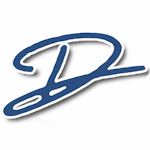

---

## Web Page Funnel,  examining page visits to purchase conversions.

Darren Lewis \
Practicate data from Codecademy

In [1]:
import pandas as pd

In [2]:
visits = pd.read_csv('visits.csv',
                     parse_dates=[1])
cart = pd.read_csv('cart.csv',
                   parse_dates=[1])
                   
checkout = pd.read_csv('checkout.csv',
                       parse_dates=[1])
purchase = pd.read_csv('purchase.csv',
                       parse_dates=[1])

Inspecting the DataFrames

In [3]:
# print(visits.head(5))
# print(cart.head(5))
# print(checkout.head(5))
# print(purchase.head(5))

Left merging visits and cart

In [4]:
visits_cart = visits.merge(cart,how='left')

In [5]:
print(visits_cart.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2000 non-null   object        
 1   visit_time  2000 non-null   datetime64[ns]
 2   cart_time   348 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 62.5+ KB
None


In [6]:
print(visits_cart)

                                   user_id          visit_time  \
0     943647ef-3682-4750-a2e1-918ba6f16188 2017-04-07 15:14:00   
1     0c3a3dd0-fb64-4eac-bf84-ba069ce409f2 2017-01-26 14:24:00   
2     6e0b2d60-4027-4d9a-babd-0e7d40859fb1 2017-08-20 08:23:00   
3     6879527e-c5a6-4d14-b2da-50b85212b0ab 2017-11-04 18:15:00   
4     a84327ff-5daa-4ba1-b789-d5b4caf81e96 2017-02-27 11:25:00   
...                                    ...                 ...   
1995  33913ac2-03da-45ae-8fc3-fea39df827c6 2017-03-25 03:29:00   
1996  4f850132-b99d-4623-80e6-6e61d003577e 2017-01-08 09:57:00   
1997  f0830b9b-1f5c-4e74-b63d-3f847cc6ce70 2017-09-07 12:56:00   
1998  b01bffa7-63ba-4cd3-9d93-eb1477c23831 2017-07-20 04:37:00   
1999  0336ca81-8d68-443f-9248-ac0b8ad147d5 2017-11-15 10:11:00   

               cart_time  
0                    NaT  
1    2017-01-26 14:44:00  
2    2017-08-20 08:31:00  
3                    NaT  
4                    NaT  
...                  ...  
1995              

How many timestamps are null for `cart_time`

In [7]:
notime = visits_cart.cart_time.isnull()
print(notime.sum())


1652


Percentage only visited.

In [8]:
total_visits = visits_cart.visit_time.count()
total_carts = visits_cart.cart_time.count()
only_visiting = round(total_visits / (total_visits+total_carts),2)*100
print(only_visiting,'%')

85.0 %


Percentage placed a t-shirt in their cart but did not checkout.

In [9]:
visits_carts_checkouts = visits_cart.merge(checkout,how ="left")

num_no_checkout = visits_carts_checkouts.checkout_time.isna()& ~visits_carts_checkouts.cart_time.isna()
cart_no_checkout =  round(num_no_checkout.sum() / visits_carts_checkouts.cart_time.isna().sum() * 100,2)
print(cart_no_checkout,'%')



7.38 %


In [10]:
all_data = visits_carts_checkouts.merge(purchase,how = 'left')


% of users who got to checkout but did not purchase

In [11]:
checkout_no_purch = ~all_data.checkout_time.isna()&all_data.purchase_time.isna()
didnt_seal_deal = round((checkout_no_purch.sum() / 2000)*100,2)
print(didnt_seal_deal,'%')

4.1 %


Observations

In [12]:
print('Only visiting percentage', only_visiting)
print('T-shirt in cart but didn\'t get to checkout percentage', cart_no_checkout)
print('Percentage in checkout but didn\'t purchase', didnt_seal_deal)

Only visiting percentage 85.0
T-shirt in cart but didn't get to checkout percentage 7.38
Percentage in checkout but didn't purchase 4.1


*The weakest part of the funnel is clearly getting a person who visited the site to add a tshirt to their cart. Once they've added a t-shirt to their cart it is fairly likely they end up purchasing it. A suggestion would be to make the add-to-cart button more prominent on the front page.*


Adding new column 'Time to purchase

In [13]:
all_data['time_to_purchase'] = all_data.purchase_time - all_data.visit_time

In [14]:
print(all_data.head(5))

                                user_id          visit_time  \
0  943647ef-3682-4750-a2e1-918ba6f16188 2017-04-07 15:14:00   
1  0c3a3dd0-fb64-4eac-bf84-ba069ce409f2 2017-01-26 14:24:00   
2  6e0b2d60-4027-4d9a-babd-0e7d40859fb1 2017-08-20 08:23:00   
3  6879527e-c5a6-4d14-b2da-50b85212b0ab 2017-11-04 18:15:00   
4  a84327ff-5daa-4ba1-b789-d5b4caf81e96 2017-02-27 11:25:00   

            cart_time       checkout_time       purchase_time time_to_purchase  
0                 NaT                 NaT                 NaT              NaT  
1 2017-01-26 14:44:00 2017-01-26 14:54:00 2017-01-26 15:08:00  0 days 00:44:00  
2 2017-08-20 08:31:00                 NaT                 NaT              NaT  
3                 NaT                 NaT                 NaT              NaT  
4                 NaT                 NaT                 NaT              NaT  


Calculate average time to purchase

In [15]:
avg_ttp = all_data.time_to_purchase.mean()

In [16]:
print('The average amount of time it took to purchase was',avg_ttp)

The average amount of time it took to purchase was 0 days 00:43:12.380952380
